# 1. Data Augmentation

In [52]:
# Import necessary lib.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
# Data augmentation on training variable

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
 zoom_range=0.2,
 horizontal_flip=True)

In [53]:
# Data augmentation on testing variable

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
# Data augmentation on training data

In [23]:
xtrain = train_datagen.flow_from_directory('./Animal_Dataset/dataset/Training',
 target_size=(64,64),
 class_mode='categorical',
 batch_size=100)

Found 1238 images belonging to 4 classes.


In [55]:
# Data augmentation on testing data

In [24]:
xtest = test_datagen.flow_from_directory('./Animal_Dataset/dataset/Testing',
 target_size=(64,64),
 class_mode='categorical',
 batch_size=100)

Found 326 images belonging to 4 classes.


# 2.CNN model training

In [56]:
# Importing req. lib.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [57]:
# Build a CNN block

In [27]:
model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer


In [50]:
# Compiling the model

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
len(xtrain)

13

In [49]:
# Train model

In [29]:
model.fit_generator(xtrain,
 steps_per_epoch=len(xtrain),
 epochs=25,
 validation_data=xtest,
 validation_steps=len(xtest))

C:\Users\Arjun\AppData\Local\Temp\ipykernel_10028\3802424551.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/25
13/13 [==============================] - 46s 3s/step - loss: 1.7762 - accuracy: 0.2666 - val_loss: 1.2531 - val_accuracy: 0.3497
Epoch 2/25
13/13 [==============================] - 70s 6s/step - loss: 1.2015 - accuracy: 0.4443 - val_loss: 1.0715 - val_accuracy: 0.6319
Epoch 3/25
13/13 [==============================] - 72s 6s/step - loss: 1.0355 - accuracy: 0.5767 - val_loss: 1.0134 - val_accuracy: 0.6227
Epoch 4/25
13/13 [==============================] - 57s 4s/step - loss: 0.8678 - accuracy: 0.6648 - val_loss: 0.7236 - val_accuracy: 0.7423
Epoch 5/25
13/13 [==============================] - 56s 4s/step - loss: 0.7786 - accuracy: 0.6826 - val_loss: 0.6909 - val_accuracy: 0.7301
Epoch 6/25
13/13 [==============================] - 50s 4s/step - loss: 0.6868 - accuracy: 0.7464 - val_loss: 0.5578 - val_accuracy: 0.8037
Epoch 7/25
13/13 [==============================] - 59s 5s/step - loss: 0.6103 - accuracy: 0.7787 - val_loss: 0.4966 - val_accuracy: 0.8098
Epoch 8/25
13/13 [==

In [58]:
# Save model

In [30]:
model.save('Animal.h5')


# 3.Testing model

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [41]:
img = image.load_img('./Animal_Dataset/dataset/Testing//elephants/mala_mala_200064__340.jpg',target_size=(600,600))

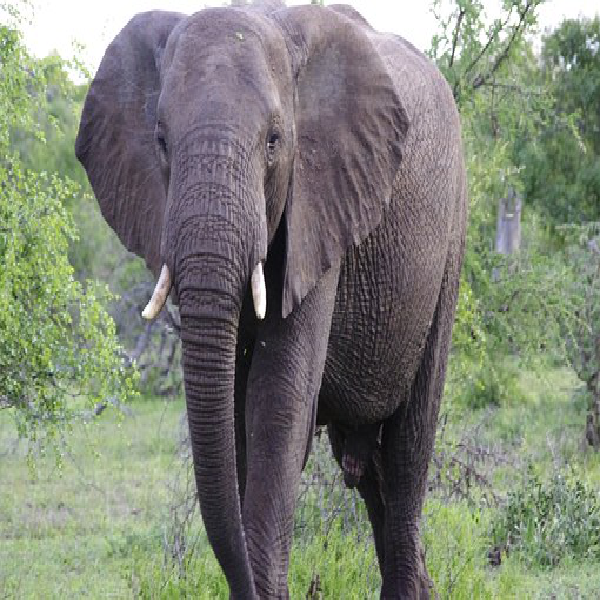

In [42]:
img

In [44]:
x = image.img_to_array(img)

In [45]:
x

array([[[253., 253., 253.],
        [255., 255., 253.],
        [254., 254., 252.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 255.]],

       [[253., 253., 253.],
        [255., 255., 253.],
        [254., 254., 252.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 255.]],

       [[254., 255., 255.],
        [245., 247., 244.],
        [254., 255., 253.],
        ...,
        [253., 253., 253.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[159., 173., 138.],
        [170., 184., 151.],
        [164., 177., 147.],
        ...,
        [157., 170., 152.],
        [127., 138., 121.],
        [142., 151., 134.]],

       [[149., 163., 128.],
        [149., 163., 128.],
        [134., 148., 115.],
        ...,
        [143., 156., 136.],
        [136., 148., 128.],
        [142., 151., 132.]],

       [[149., 163., 128.],
        [149., 163., 128.],
        [134., 1

In [46]:
img = np.expand_dims(x,axis=0)

In [47]:
img

array([[[[253., 253., 253.],
         [255., 255., 253.],
         [254., 254., 252.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [254., 254., 255.]],

        [[253., 253., 253.],
         [255., 255., 253.],
         [254., 254., 252.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [254., 254., 255.]],

        [[254., 255., 255.],
         [245., 247., 244.],
         [254., 255., 253.],
         ...,
         [253., 253., 253.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[159., 173., 138.],
         [170., 184., 151.],
         [164., 177., 147.],
         ...,
         [157., 170., 152.],
         [127., 138., 121.],
         [142., 151., 134.]],

        [[149., 163., 128.],
         [149., 163., 128.],
         [134., 148., 115.],
         ...,
         [143., 156., 136.],
         [136., 148., 128.],
         [142., 151., 132.]],

        [[149., 163., 128.],
       